# 7.1 K-최근접이웃법(KNN)



다음과 같은 데이터가 있다고 하자. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
data_red = np.array([[1,1],[3,4],[5,6],[7,9],[1,10],[3,6],[6,8]])
data_blue = np.array([[10,10],[12,14],[13,14],[15,14],[20,15],[17,15],[8,7.3]])
data_target= np.array([8,8])

In [2]:
theta = np.linspace( 0 , 2 * np.pi , 150 )

a1 = 8+ np.cos( theta )
b1 = 8+ np.sin( theta )

a2 = 8+2.1*np.cos(theta)
b2 = 8+2.1*np.sin(theta)

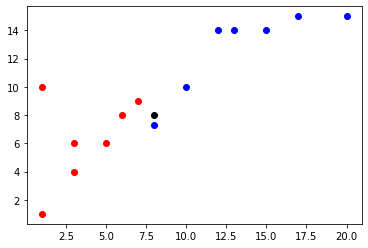

In [3]:
plt.scatter(data_red[:,0],data_red[:,1],color="red")
plt.scatter(data_blue[:,0],data_blue[:,1],color="blue")
plt.scatter(data_target[0],data_target[1],color="black")

우리가 관찰한 데이터가 빨간색, 파란색 데이터라고 할때 

주어진 검은색 데이터가 빨간색 그룹인지 파란색 그룹에 속하는지를 판단하는 것이 목표이다.

#### K-최근접이웃법 원리

검은색 점 주변 K개의 데이터를 바탕으로 분류한다.

예시는 아래와 같다. 

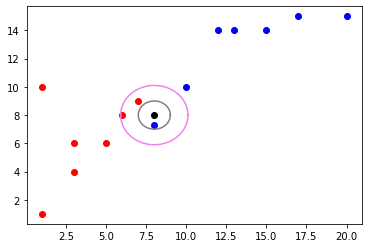

In [4]:
plt.scatter(data_red[:,0],data_red[:,1],color="red")
plt.scatter(data_blue[:,0],data_blue[:,1],color="blue")
plt.scatter(data_target[0],data_target[1],color="black")
plt.plot(a2,b2,color = "violet")
plt.plot(a1,b1,color = "gray")

K=1 일때, 즉 검은색 데이터 주변의 1개의 데이터는 파란색 데이터 이므로 검은색 데이터를 파란색 그룹으로 분류한다.

K=3일때, 검은색 데이터 주변 3개의 데이터는 빨간색2개, 파란색1개 이므로 빨간색 그룹으로 분류한다. 

#### K 값의 결정 

K값이 작을수록 더 세세하게 분류가 가능하지만, 훈련데이터(Test)에 대해서는 비교적 잘 맞추지 못하는 과적합이 발생할 수 있다. 

일반적으로, $3 \leq K \leq10$ 사이의 값을 이용한다

K: 초매개변수(Hyper parameter)

### 7.1.1 분류

이번에는 실제 데이터를 바탕으로 실험해보자. 

Chapter 6-1에서 사용했었던 Breast cancer 데이터를 불러오자.

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [6]:
feature = data.data
target = data.target

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

주어진 데이터를 훈련데이터와 검증데이터로 나누어보자. 

In [8]:
train_x,test_x,train_y,test_y = train_test_split(feature,target,random_state=2020)

Min-Max 로 정규화를 진행하자. 

In [9]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

아래는 K=3에 대한 KNN모형을 생성하는 코드이다. 

In [11]:
KNN_model = KNeighborsClassifier(3) 

In [12]:
KNN_model.fit(train_x_minmax,train_y)

KNeighborsClassifier(n_neighbors=3)

Test data에 대한 예측 class는 아래와 같다. 

In [13]:
KNN_model.predict(test_x_minmax)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

score 함수는 $정확도(Accuracy)={맞춘 Data 개수\over 전체 Data 개수} $ 를 계산해주는 함수이다. 

In [14]:
KNN_model.score(test_x_minmax,test_y)

0.958041958041958

#### 문제7.1

for loop를 사용해서 위에서의 훈련데이터에 대한 정확도(Accuracy)를 구해라. 

Sol)

In [15]:
test_pred = KNN_model.predict(test_x_minmax)

In [16]:
hit = 0
for i in range(0,len(test_y)):
    
    if test_y[i] == test_pred[i]:
        hit  += 1

In [17]:
hit/len(test_y)

0.958041958041958

#### 문제7.2 

위의 예시에서, 패키지를 사용해서 혼돈행렬을 구해라. 

In [45]:
from sklearn.metrics import classification_report

report = classification_report(test_y,test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.95      0.98      0.96        82

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### 7.1.2 회귀

KNN방법은 분류뿐만 아니라, 회귀 즉 Y(target)이 수치형일때도 사용가능하다. 

Chapter 6-1에서 사용했었던, Boston data를 불러오자. 

In [46]:
from sklearn import datasets
data =  datasets.load_boston()

In [47]:
data_x = data.data
data_y = data.target

In [48]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15)

In [49]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

모형을 아래와 같이 학습시키자. 

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
KNN_model = KNeighborsRegressor(3)
KNN_model.fit(train_x_minmax,train_y)

KNeighborsRegressor(n_neighbors=3)

Test data에 대한 예측값은  아래와 같다. 

In [52]:
KNN_model.predict(test_x_minmax)

array([23.53333333, 40.83333333, 24.86666667, 22.3       , 19.63333333,
       10.46666667, 22.03333333, 19.56666667, 22.63333333, 17.73333333,
       17.43333333, 21.06666667, 18.5       , 12.86666667, 21.03333333,
       13.16666667,  9.1       ,  9.36666667, 19.86666667, 18.83333333,
       35.93333333, 16.3       , 20.96666667, 18.03333333, 20.4       ,
       18.56666667, 27.8       , 30.16666667, 19.76666667, 25.13333333,
       25.16666667, 15.06666667, 20.93333333, 20.56666667, 23.26666667,
       22.5       , 26.53333333, 33.66666667, 12.9       , 21.66666667,
       26.86666667, 33.56666667, 14.03333333, 23.4       , 22.76666667,
       21.66666667, 19.36666667, 28.06666667, 28.03333333, 10.06666667,
       31.06666667, 15.43333333, 13.6       , 10.9       , 16.56666667,
       30.2       , 10.33333333, 23.3       , 16.1       , 22.3       ,
       17.3       , 27.33333333, 19.76666667, 27.56666667, 31.06666667,
       19.96666667, 22.06666667, 18.76666667, 24.13333333, 14.03

정확도(결정계수,$R^{2}$)를 구해보자. 

In [53]:
KNN_model.score(test_x_minmax,test_y)

0.7175264336849667

# 7.2 나이브 베이즈(Naive Bayes)

나이브 가정: 조건이 주어졌을때, 확률변수들이 모두 독립이라고 가정하는 것 
    
나이브 베이즈 : 나이브 가정하에서, 베이즈정리를 이용해서 사후분포 모델링

#### 7.2.1분류

가우시안 나이브 베이즈 모형을 이용해서 iris 데이터를 분석해보자. 

In [54]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()

In [55]:
data_x = data.data
data_y = data.target

Data는 아래와 같다. 

In [56]:
data_x_df = pd.DataFrame(data_x)
data_x_df.columns = data.feature_names

In [57]:
data_x_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
data_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

data_y 에서 0이면 setosa, versicolor 이면 1 , 나머지는 2 로 변환된 상태이다. 

In [60]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15)

In [61]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

이제 가우시안 베이즈 모형을 적합시켜보자. 

분류할때 사용하는 모형이다.

In [62]:
from sklearn.naive_bayes import GaussianNB

In [66]:
model = GaussianNB()
model.fit(train_x_minmax,train_y)

GaussianNB()

검증 데이터에 대한 정확도(Accuracy)를 계산해보자. 

$정확도 ={맞춘 Data 개수\over 전체 Data 개수}$

In [64]:
model.score(test_x_minmax,test_y)

1.0

#### 문제7.3 

위의 예시에서 confusion matrix를 구하여라. 

In [70]:
pred_y = model.predict(test_x_minmax)
pred_y

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0])

In [76]:
from sklearn.metrics import classification_report

report = classification_report(test_y, pred_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#### 7.2.2 회귀

앞에서의 Boston 데이터를 바탕으로 나이브 베이즈 모형인 BayesianRidge 을 적용해보자. 

In [77]:
data =  datasets.load_boston()

In [78]:
data_x = data.data
data_y = data.target

In [79]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15)

In [80]:
minmax = MinMaxScaler()
minmax.fit(train_x)

train_x_minmax = minmax.transform(train_x)
test_x_minmax = minmax.transform(test_x)

이제 모형을 적합시켜보자. 

In [81]:
from sklearn.linear_model import BayesianRidge

In [82]:
model = BayesianRidge()
model.fit(train_x_minmax,train_y)

BayesianRidge()

이번에는 검증데이터에 대하여 정확도($R^{2}$)를 구해보자. 

In [83]:
model.score(test_x_minmax,test_y)

0.6879838990457641

#### 문제7.4

앞에서의 BayesianRidge 모형에 대하여 Test data의 MSE를 구하여라. 

참고

Test data = $(x_{1},y_{1}),...,(x_{n},y_{n})$일때 $MSE = {1\over n}\sum_{i=1}^{n}(\hat{f}(x_{i})-y_{i})^{2}$ 

Sol)

In [84]:
test_y

array([22. , 48.8, 23.1, 11.9, 22.8, 13.8, 19.3, 16.3, 23.3, 17.6, 18.1,
       21.2, 17.5, 13.4, 22. , 10.9,  7.2,  5. , 20.6, 16.5, 43.5, 13.9,
       20.8, 18. , 20.4, 18.5, 22. , 16.8, 19.6, 22.9, 23.3, 14.6, 19.8,
       20.6, 24.4, 20.8, 21.7, 22.8, 13.1, 18.9, 42.8, 33.2, 16.7, 22.3,
       29.8, 18.9, 18.8, 28.7, 23.1, 13.3, 35.4, 15.6, 13.1,  8.3, 19.6,
       32.9,  8.5, 25. , 13.3, 22. , 13.8, 36.2, 19.5, 24.3, 32. , 19.3,
       23.8, 17.5, 22.9, 18.4, 20.3, 24.4, 21.7, 13.5, 34.9, 24.1, 43.1,
       16.6, 13.8, 10.5, 15.7, 10.2, 42.3, 33. , 50. , 16.4, 32.7, 21.4,
       22.6, 16.2, 34.7, 21.9, 21.9, 18.9, 23.3, 26.7, 18.9, 36.2, 21.7,
       21.7, 14.6,  5.6, 30.5,  8.4, 29.6, 15.4, 23.4, 21.5, 21.8, 38.7,
       29.4, 21.4, 20.5, 50. , 22.2, 20.7, 25. , 20.2, 11.7, 29. , 24.3,
        9.5, 18.3, 50. , 24.1, 11.7, 22. ])

In [86]:
test_pred = model.predict(test_x_minmax)
test_pred

array([29.00293054, 40.30359839, 23.12243431, 22.43611322, 26.4273179 ,
        6.90354702, 17.27815375, 12.78836404, 28.33108559, 16.29276953,
       17.65082312, 22.84006732, 16.01902116, 16.40450584, 21.01132394,
       14.52631764,  8.68181707,  7.33698489, 21.8378935 , 11.61259898,
       38.97266744, 13.28806465, 23.63108756, 19.32899554, 19.32337359,
       19.4482832 , 27.30822139, 20.17641615, 19.80079554, 19.83252802,
       21.46959585,  8.92661871, 21.13061849, 19.76261719, 23.7107904 ,
       18.49991313, 24.82459569, 28.38899305, 20.50702959, 18.85010948,
       28.92762972, 35.35048111, 19.7564135 , 27.35100374, 25.65931652,
       21.55498967, 21.60815028, 30.37369565, 25.21378258, 20.43036917,
       30.88418819, 15.98988778, 14.24649633, 13.66390457, 17.53910177,
       30.44313386,  8.12306272, 28.78387469, 16.56608684, 26.01796766,
       17.08305999, 27.67053344, 18.65801258, 29.75548485, 33.89764547,
       20.2768182 , 23.73063166, 18.56787777, 25.03946306, 18.85

In [87]:
mse = 0 
for i in range(0,len(test_y)):
    mse += (test_y[i]-test_pred[i])**2
mse/len(test_y)

26.0928713698756

In [88]:
import numpy as np

In [89]:
np.sqrt(26)

5.0990195135927845

# 7.3 의사결정나무

결정트리 모형은 규칙기반으로 만들어지며, 규칙에 의해 도달한 노드를 통해 예측한다. 

의사결정나무에서는 노드들(연봉3000,정규직,빚)에 의하여 대출거절할지 승인할지를 예측한다. 

#### 노드들의 정의

뿌리마디(root node)  : 시작하는 노드

끝마디(terminal node) : 마지막 노드


#### 노드를 split 하는 기준 

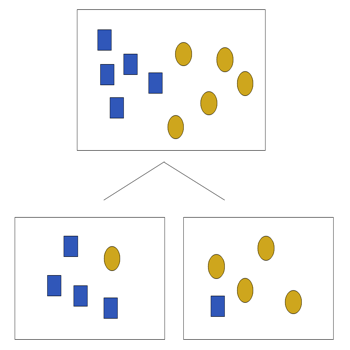

In [3]:
image = Image.open("7_1_picture2.png")
image.resize((350,350))

위같은 경우처럼 나뉠수도 있고, 다른 여러가지 경우의 수가 존재한다. 

이때, 다음과 같이 정의된 지니계수를 최소화 하는 방향으로 노드를 나눈다. 

#### 지니계수 정의

지니계수란 불순도를 측정하는 측도이다. 즉, 지니계수가 낮을수록 불순도가 적다. 


$G = 1-\sum_{i=1}^{c}p_{i}^{2}$

where $p_{1}$ : 1이라는 클래스가 해당 노드에 있는 비율

#### 예시

위의 그림에서 뿌리노드의 지니계수 값은 $1-({5\over 10})^{2}-({5\over 10})^{2}$ 이다.

뿌리노드에서 split된 노드들의 지니계수값은 다음과 같이 계산된다.

왼쪽 노드의 지니계수 G1= $1-({4\over 5})^{2} - ({1\over 5})^{2}$

오른쪽 노드의 지니계수 G2= $1-({1\over 5})^{2} - ({4\over 5})^{2}$


split된 노드들의 지니계수 G3= ${5\over 10}G1 + {5\over 10}G2$

#### 의사결정나무의 단점과 장점

장점 : 결과가 도출되는 과정을 직관적으로 확인 할 수 있음, 이상치에 덜 영향받음

단점 : 데이터에 따라 규칙이 바뀌므로 결과가 안정적이지 못함

#### 7.3.1 분류

iris data를 불러오자. 

In [92]:
data = load_iris()
data_x = data.data
data_y = data.target

In [93]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,random_state=15)

#### 참고

결정트리 모형을 학습시킬때는 데이터에 대한 정규화를 진행하지 않아도 된다. 

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
model = DecisionTreeClassifier()
model.fit(train_x,train_y)

DecisionTreeClassifier()

검증데이터에 대한 정확도를 알아보자. 

In [96]:
model.score(test_x,test_y)

0.9736842105263158

모형의 그림을 그려보자. 

In [97]:
from sklearn.tree import plot_tree

[Text(167.4, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(257.53

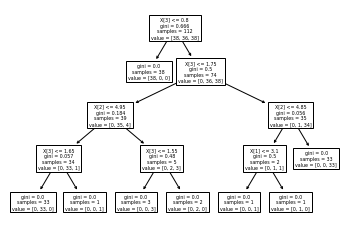

In [98]:
plot_tree(model)

#### 문제7.5 

위의 의사결정나무 모형 결과에 대한 confusion matrix를 구하여라. 

In [100]:
from sklearn.metrics import classification_report 

y_pred = model.predict(test_x)
report = classification_report(test_y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



#### 문제7.6

from sklearn.tree import DecisionTreeRegressior

위의 패키지를 이용해서, 보스턴 데이터에 대한 의사결정나무 회귀모형을 훈련시키고 검증데이터에 대하여 성능평가를 해라. 

In [107]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.9166666666666666